# Arrests

## Introduction
For this project, I looked for the best neighborhood in Pittsburgh through analyzing police arrest data. I chose this data set because arrests and the safety of a neighborhood go hand in hand, as the city with the most arrests has the best police officers.

## The Metric
My metric was the arrests made throughout the city of Pittsburgh, as I wanted to find the safest neighborhood. The number of arrests goes hand in hand with the effectiveness of law enforcement, as more arrests mean that officers are properly combating criminal activity. I used data from https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f to draw my conclusions, as it has various information on each arrest made in Pittsburgh, including the neighborhood where the arrest took place.

## The Best Neighborhood
I believe Shadyside is the best neighborhood because it seems to be the safest neighborhood I've visited so far. However, I was incorrect, as Shadyside ranked 22nd in leading number of arrests by police officers. Central Business District had the highest number of arrests and thus the best law enforcement and safest neighborhood to live in Pittsburgh.

To find the best neighborhood based on arrest data, I first had to read the information in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#store the dataset into a variable
arrest_data = pd.read_csv("arrests.csv")
#view the data set
arrest_data

,_id,PK,CCR,AGE,GENDER,RACE,ARRESTTIME,ARRESTLOCATION,OFFENSES,INCIDENTLOCATION,INCIDENTNEIGHBORHOOD,INCIDENTZONE,INCIDENTTRACT,COUNCIL_DISTRICT,PUBLIC_WORKS_DIVISION,X,Y
0,1,1975272,16158872,42.0,F,B,2016-08-24T12:20:00,"4700 Block Centre AV Pittsburgh, PA 15213",3929 Retail Theft.,"4700 Block Centre AV Pittsburgh, PA 15213",Bloomfield,5,804.0,8.0,2.0,-79.949277,40.452551
1,2,1974456,16144120,31.0,M,W,2016-08-03T14:55:00,"4200 Block Steubenville PKE Pittsburgh, PA 15205",13(a)(16) Possession of Controlled Substance,"4200 Block Steubenville PKE Pittsburgh, PA 15205",Outside City,OSC,5599.0,NaN,NaN,-80.088018,40.440136
2,3,1974466,16144165,63.0,F,B,2016-08-03T16:45:00,"900 Block Freeport RD Fox Chapel, PA 15238",3929 Retail Theft.,"900 Block Freeport RD Fox Chapel, PA 15238",Westwood,5,2811.0,9.0,2.0,-79.891803,40.486625
3,4,1974550,16145257,25.0,F,W,2016-08-05T02:36:00,"Foreland ST & Cedar AV Pittsburgh, PA 15212",5503 Disorderly Conduct. / 5505 Public Drunken...,"Foreland ST & Cedar AV Pittsburgh, PA 15212",East Allegheny,1,2304.0,1.0,1.0,-80.001939,40.454080
4,5,1974596,16145962,25.0,M,B,2016-08-06T02:00:00,"900 Block Woodlow ST Pittsburgh, PA 15205",2702 Aggravated Assault. / 2705 Recklessy Enda...,"900 Block Woodlow ST Pittsburgh, PA 15205",Crafton Heights,5,2814.0,2.0,5.0,-80.052204,40.445900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65134,86395,2062454,23141162,24.0,F,B,2023-09-12T08:00:00,"900 Block 2nd AV Pittsburgh, PA 15219",903 Criminal Conspiracy. / 2701 Simple Assault...,"Parkfield ST & Dartmore ST Pittsburgh, PA 15210",Carrick,3,2901.0,4.0,3.0,-79.996301,40.394453
65135,86396,2062455,23140340,35.0,M,B,2023-09-04T16:30:00,"Liberty BRDG & P J Mc Ardle RDWY Pittsburgh, P...",2701 Simple Assault.,"Liberty BRDG & P J Mc Ardle RDWY Pittsburgh, P...",South Side Slopes,3,1706.0,NaN,NaN,NaN,NaN
65136,86397,2062456,23141901,31.0,M,B,2023-09-07T02:19:00,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",2701 Simple Assault.,"500 Block Mt Pleasant RD Pittsburgh, PA 15214",Northview Heights,1,2609.0,NaN,NaN,NaN,NaN
65137,86398,2062457,23141904,38.0,M,W,2023-09-07T02:33:00,"S Main ST & W Carson ST Pittsburgh, PA 15219",1784 Proof of Financial Responsibility Followi...,"S Main ST & W Carson ST Pittsburgh, PA 15219",South Shore,3,1921.0,NaN,NaN,NaN,NaN


Evidently, we do not need all of the columns to properly interpret our dataset. To remove them, I wrote the following code:

In [17]:
#only include the column with details on the neighborhood where the incident occurred
arrest_data = arrest_data.filter(items=["INCIDENTNEIGHBORHOOD"])

#display the resulting DataFrame
arrest_data

,INCIDENTNEIGHBORHOOD
0,Bloomfield
1,Outside City
2,Westwood
3,East Allegheny
4,Crafton Heights
...,...
65134,Carrick
65135,South Side Slopes
65136,Northview Heights
65137,South Shore


We have each individual arrest but we still need to group them together by neighborhood so we can compare these neighborhoods:

In [11]:
#gets the data series which has the number of times each neighborhood showed up in this data set
#also sorts it in descending order to see which neighborhood has the most number of arrests at the top
arrests_by_neighborhood = arrest_data.value_counts()
#name the column with the number of arrests "arrests"
arrests_by_neighborhood = pd.DataFrame(arrests_by_neighborhood, columns=["arrests"])
#convert to dictionary for future calculations
arrests_dict = arrests_by_neighborhood.to_dict()

We can see that there are certain cities with much more arrests than others. By visualizing these findings, it's clear how significant this difference is.

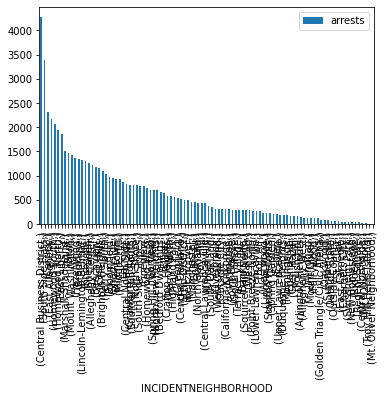

In [12]:
#use a bar plot to visualize arrests by each neighborhood
arrests_by_neighborhood.plot.bar()

That's a pretty crowded x-axis, filtering out the neighborhoods with less arrests would help make this more readable.

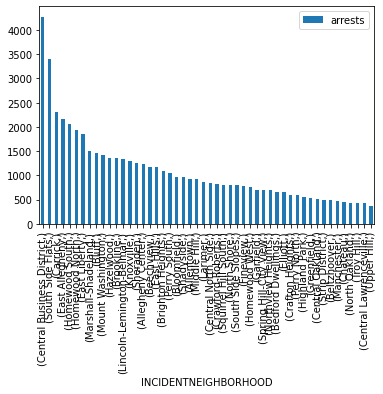

In [13]:
#only include the top 50 values
arrests_by_neighborhood.head(50).plot.bar()

That's still a bit too crowded, this data can be filtered again:

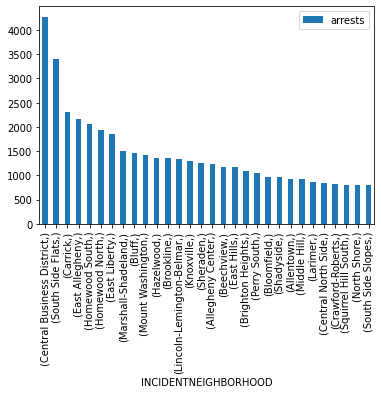

In [14]:
#only include the top 30 values
arrests_by_neighborhood.head(30).plot.bar()

We can clearly see that the number of incidents per neighborhood varies widely.

Based on this data, it's clear that Central Business District is the best neighborhood in Pittsburgh, as it has the most number of arrests and thus the most effective law enforcement.

## Conclusion
Looking at these results, it appears that Central Business District is the best neighborhood in Pittsburgh, unlike my prediction, Shadyside, earlier. I believe that safety of a neighborhood is very important in determining if it is the best, and arrest rates are an accurate way of quantifying this. However, not all people arrested are guilty; some arrests are unwarranted, meaning that this data set could be biased.